## <center> IMDB Rating Prediction </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

In [2]:
df=pd.read_csv("IMDB.csv",encoding='latin=1') # encoding is used for error handling 
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


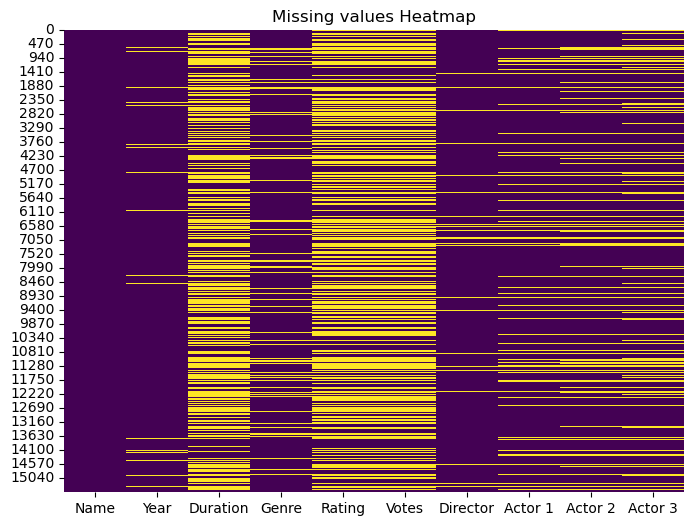

In [6]:
# to check the missing values 
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.title('Missing values Heatmap')
plt.show()


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# we drop the null rows
df.dropna(subset=['Rating','Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [9]:
# here the missing are filled by mean of duration column
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

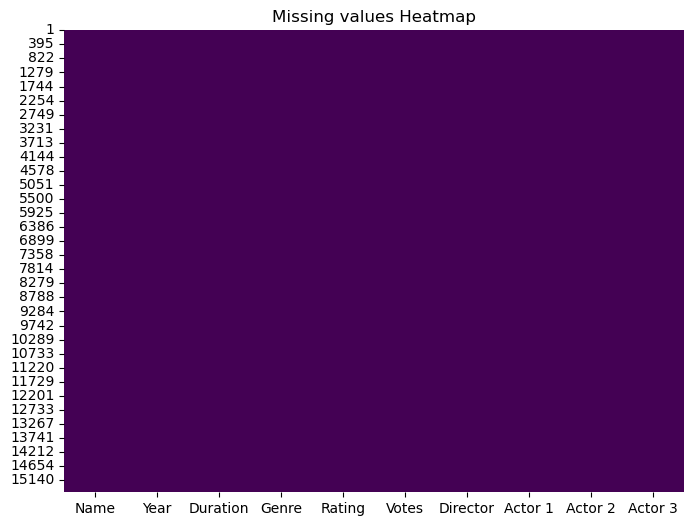

In [10]:
# to check the missing values 
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')
plt.title('Missing values Heatmap')
plt.show()


In [11]:
# Now remove the duplicates 
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [12]:
# extract only year without brackets 
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

released_year = []
for year in df['Year']:
    if len(year.split('(')) == 1:
        released_year.append(year.split('(')[0])
    elif len(year.split('(')) > 1:
        released_year.append(year.split('(')[1])
df['Year'] = released_year
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.000000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
# convert the type of Vote and year with integer 
df['Votes']=df['Votes'].str.replace(',','').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


## EDA

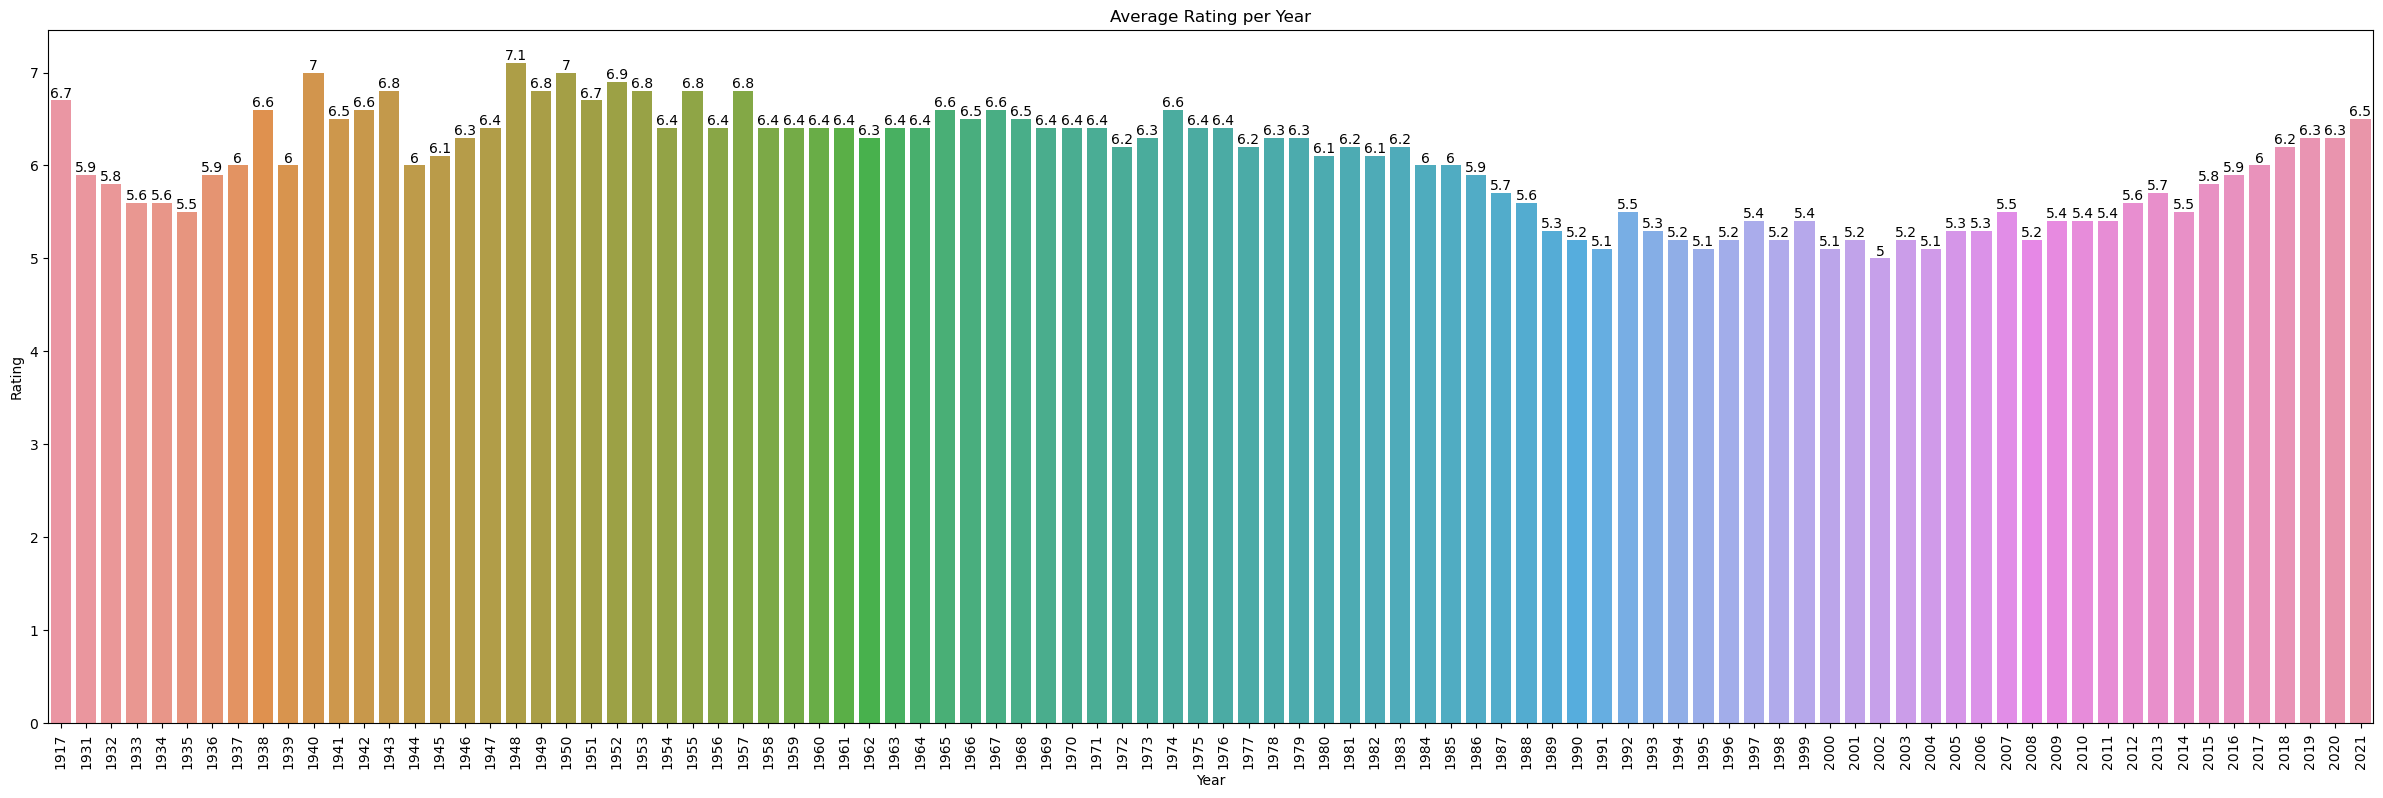

In [14]:
# In this we group our DataFrame df by the 'Year' column and calculates the mean rating for each year. 
yearly_rating=df.groupby('Year').agg({'Rating':'mean'}).reset_index().sort_values(by='Rating',ascending=False)
yearly_rating['Rating']=round(yearly_rating['Rating'],1)

# graph plotting 
plt.figure(figsize=(30,9))
plot=sns.barplot(data=yearly_rating, x='Year',y='Rating')
plot.bar_label(plot.containers[0])
plt.title('Average Rating per Year')
plt.xticks(rotation=90)
plt.show()



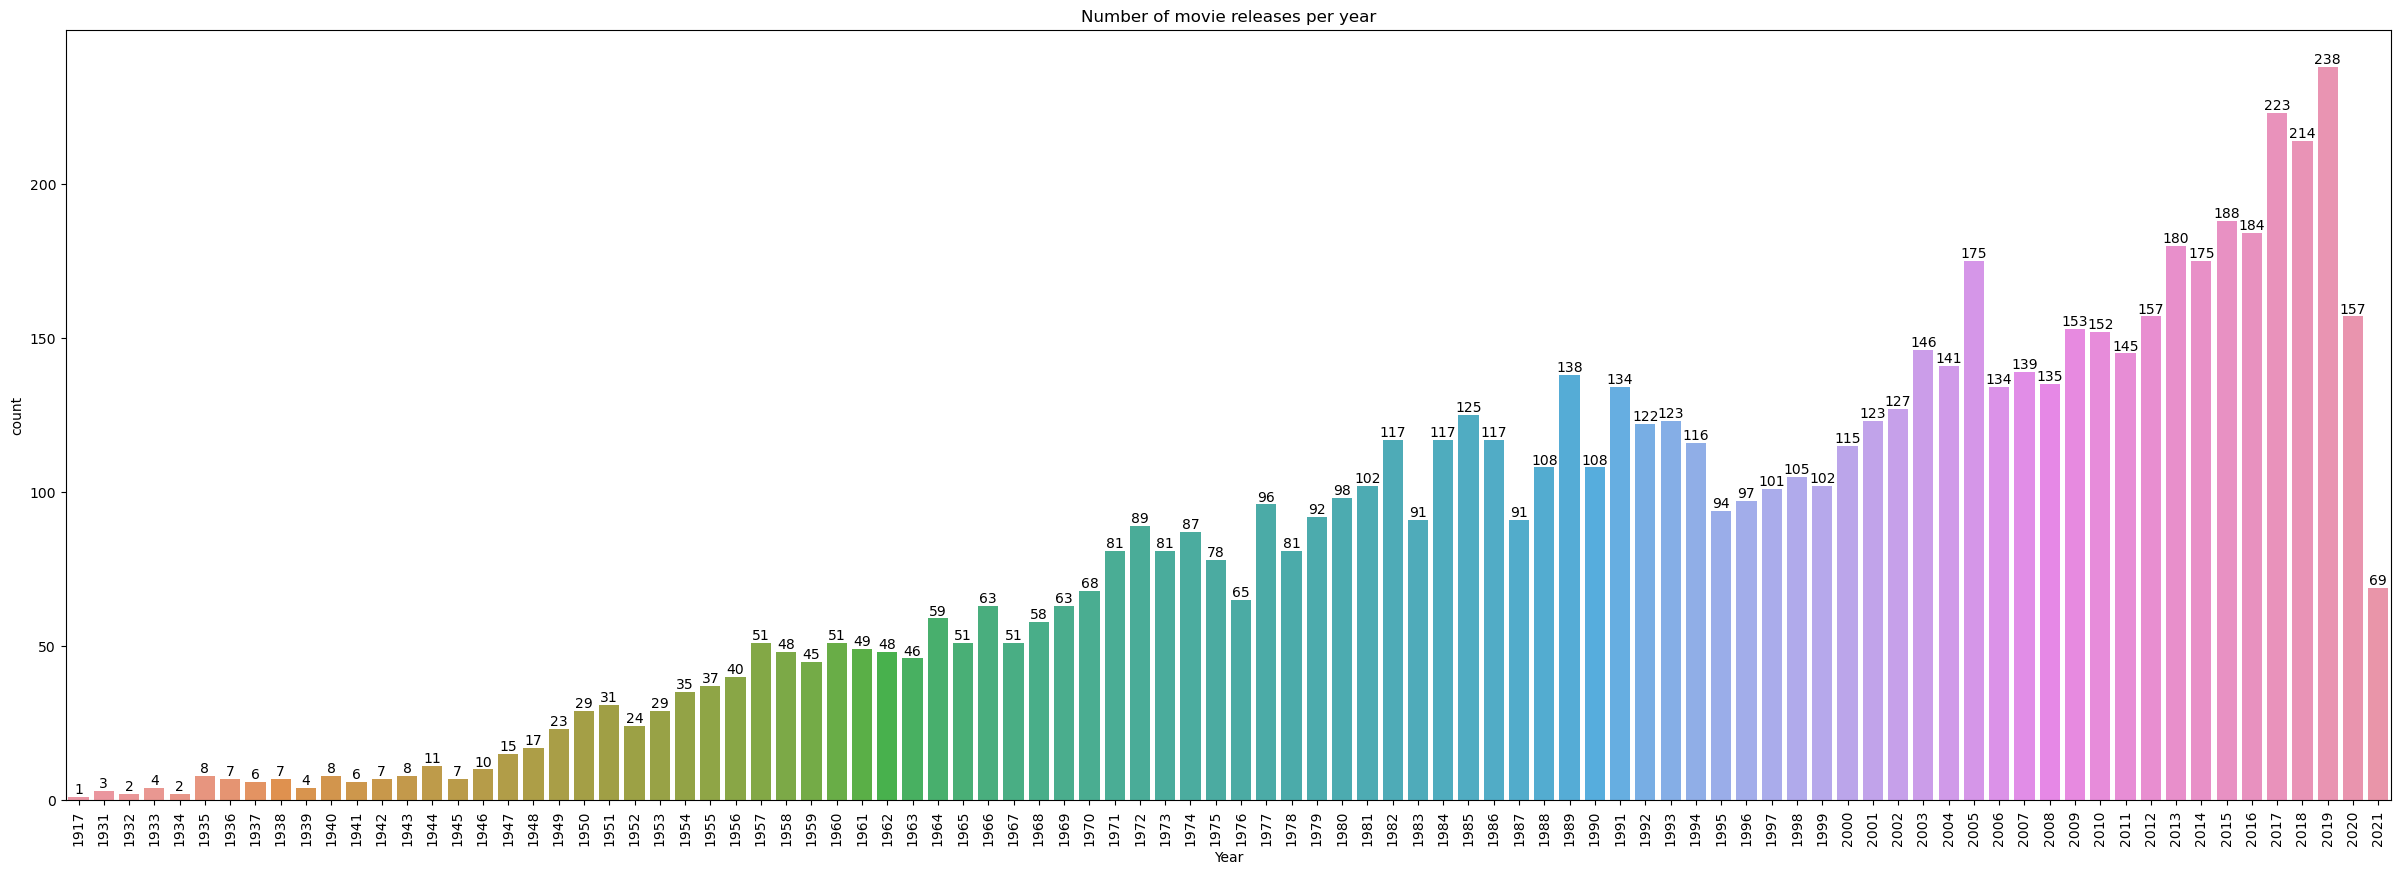

In [15]:
# No. Of Movies release per year 
yearly_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(30,10))
plot = sns.barplot(data=yearly_count, x='Year', y='count')
plot.bar_label(plot.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()
#this clearly shows that biggest count of movies release are in 2019

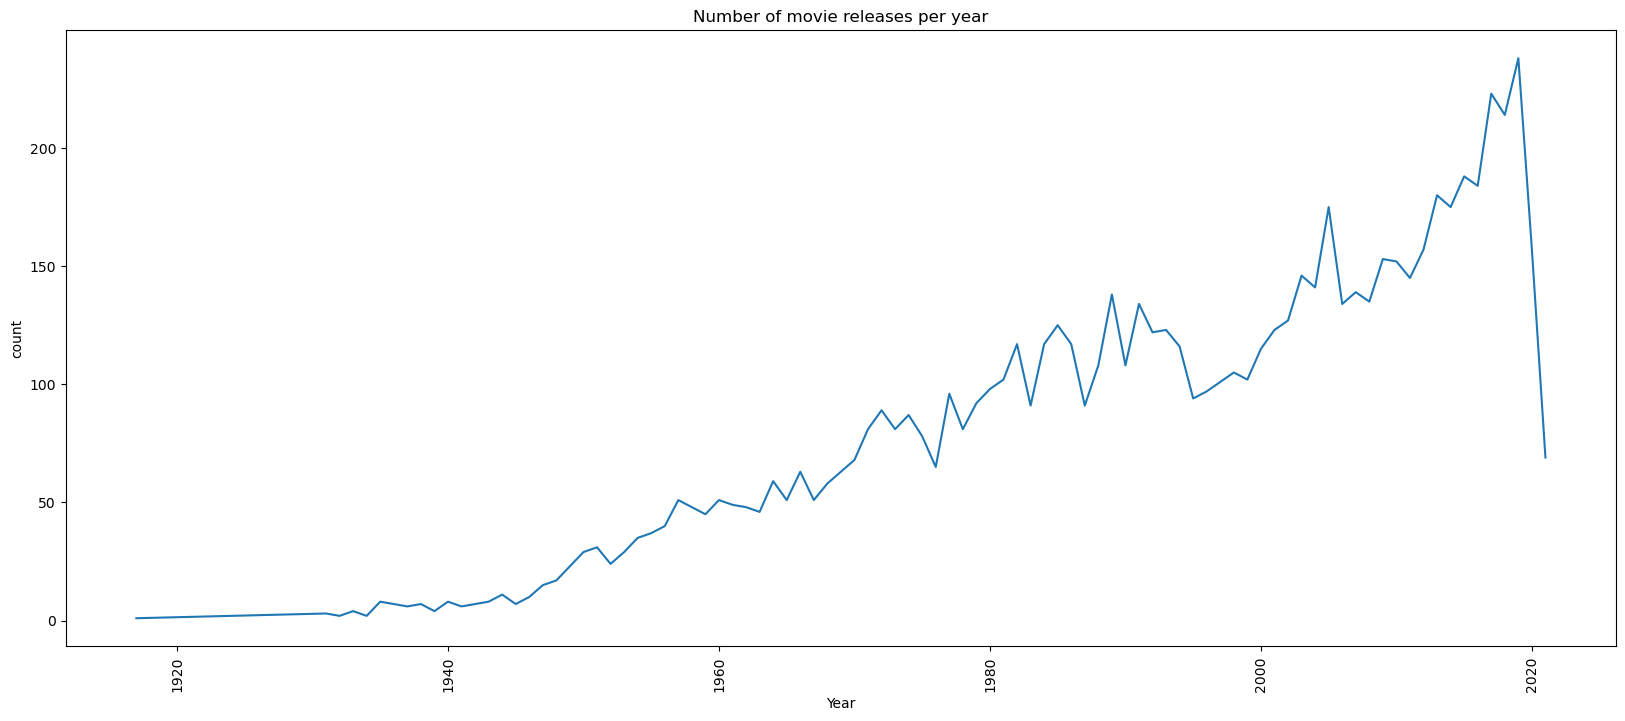

In [16]:
#Line plot
plt.figure(figsize=(20,8))
plot = sns.lineplot(data=yearly_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

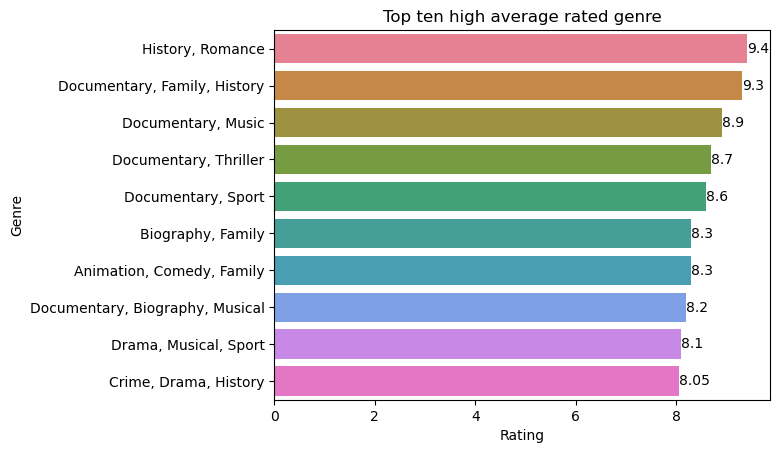

In [17]:
# plot for top ten high rated movies 
genre_rate=df.groupby('Genre').agg({'Rating':'mean'}).reset_index().sort_values(by='Rating',ascending=False).head(10)
plot=sns.barplot(data=genre_rate, x='Rating',y='Genre',palette='husl')

plot.bar_label(plot.containers[0])
plt.title('Top ten high average rated genre')
plt.show()
# History and Romance have the highest rating which means romance an history are widely seen and like by the audience

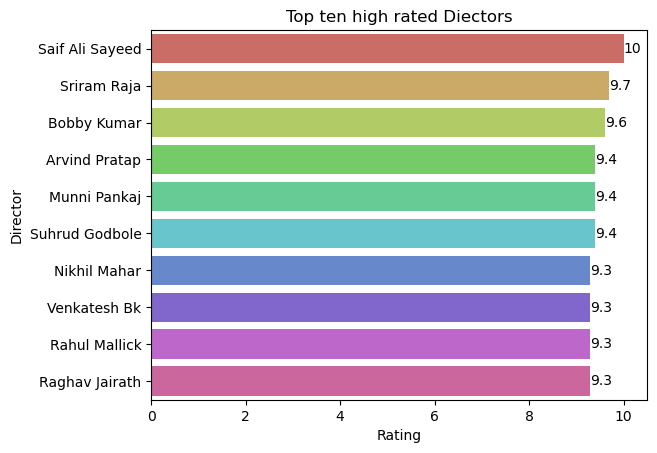

In [18]:
# Top Ten directors 
director_rate=df.groupby('Director').agg({'Rating':'mean'}).reset_index().sort_values(by='Rating',ascending=False).head(10)

plot=sns.barplot(data=director_rate, x='Rating',y='Director', palette='hls')
plot.bar_label(plot.containers[0])
plt.title('Top ten high rated Diectors')
plt.show()

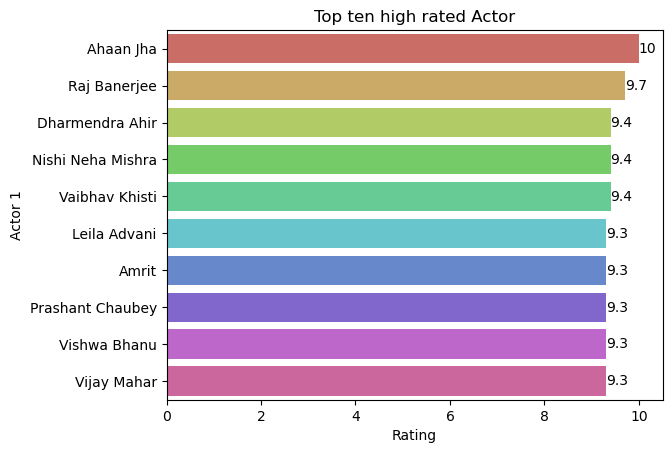

In [19]:
# Top Ten Actors
Actor_rate=df.groupby('Actor 1').agg({'Rating':'mean'}).reset_index().sort_values(by='Rating',ascending=False).head(10)

plot=sns.barplot(data=Actor_rate, x='Rating',y='Actor 1', palette='hls')
plot.bar_label(plot.containers[0])
plt.title('Top ten high rated Actor')
plt.show()

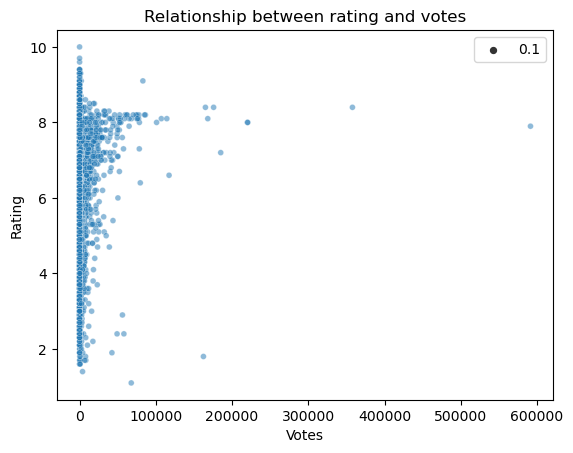

In [20]:
# Relationship between ratings and votes
sns.scatterplot(data=df, x='Votes', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and votes')
plt.show()

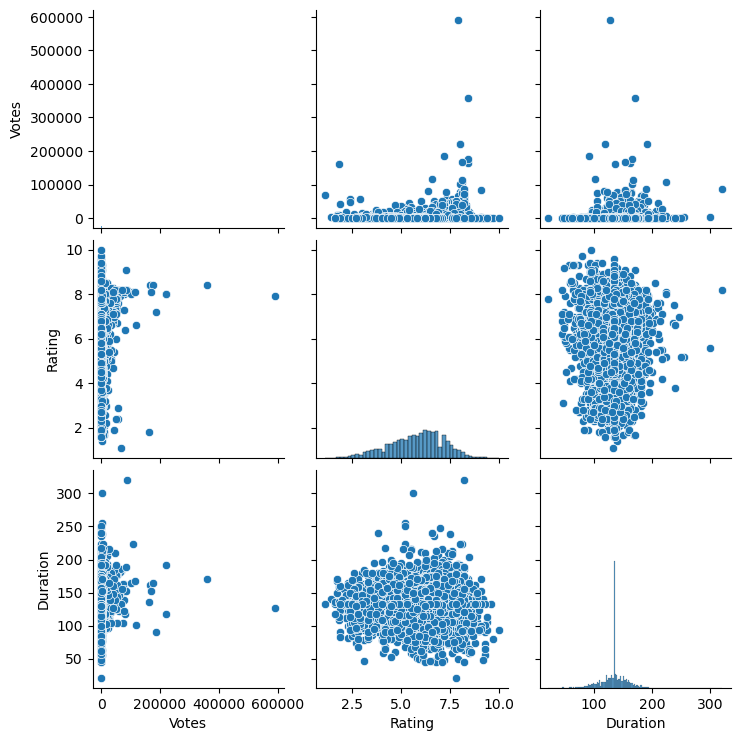

In [21]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']]);

In [22]:
df_update = df.drop(['Name'], axis=1)
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int32  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int32  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 531.4+ KB


In [23]:
df_update

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [24]:

genre_encoding_map = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

director_encoding_map = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()

actor1_encoding_map = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()

actor2_encoding_map = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()

actor3_encoding_map = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()


In [25]:
#enoding for Genre, director, Actor 1, actor 2, and actor 3 


df_update['genre_encoded'] = round(df_update['Genre'].map(genre_encoding_map['Rating']),1)

df_update['director_encoded']=round(df_update['Director'].map(director_encoding_map['Rating']),1)

df_update['actor 1_encoded']=round(df_update['Actor 1'].map(actor1_encoding_map['Rating']),1)

df_update['actor 2_encoded']=round(df_update['Actor 2'].map(actor2_encoding_map['Rating']),1)

df_update['actor 3_encoded']=round(df_update['Actor 3'].map(actor3_encoding_map['Rating']),1)


In [26]:
df_update.drop(['Genre','Director','Actor 1', 'Actor 2', 'Actor 3' ], axis=1, inplace=True)

df_update.head()

,Year,Duration,Rating,Votes,genre_encoded,director_encoded,actor 1_encoded,actor 2_encoded,actor 3_encoded
1,2019,109.0,7.0,8,6.3,7.0,6.8,7.0,7.0
3,2019,110.0,4.4,35,5.7,4.4,5.4,4.4,4.4
5,1997,147.0,4.7,827,6.2,5.4,4.8,5.8,5.8
6,2005,142.0,7.4,1086,6.8,7.5,5.3,6.0,6.5
8,2012,82.0,5.6,326,5.5,5.6,5.6,5.9,5.6


## Modelling 

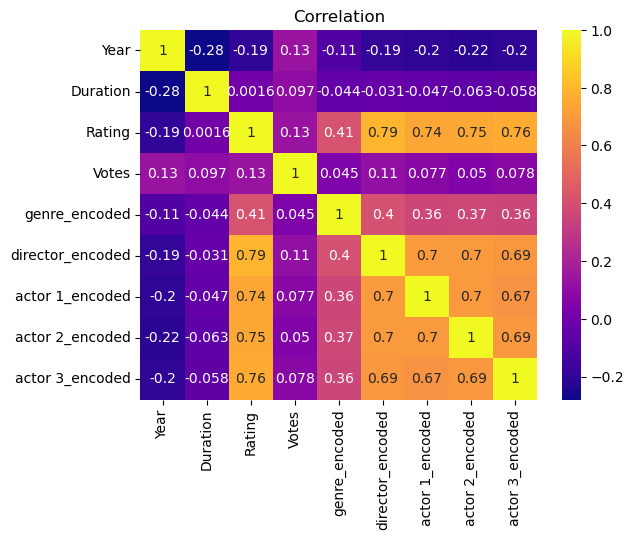

In [27]:
# plot the correlation 
sns.heatmap(df_update.corr(), annot=True, cmap='plasma')
plt.title('Correlation')
plt.show()

In [28]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# preparing x and y for modelling 
X = df_update.drop('Rating', axis=1)

y = df_update['Rating']

X.head()


,Year,Duration,Votes,genre_encoded,director_encoded,actor 1_encoded,actor 2_encoded,actor 3_encoded
1,2019,109.0,8,6.3,7.0,6.8,7.0,7.0
3,2019,110.0,35,5.7,4.4,5.4,4.4,4.4
5,1997,147.0,827,6.2,5.4,4.8,5.8,5.8
6,2005,142.0,1086,6.8,7.5,5.3,6.0,6.5
8,2012,82.0,326,5.5,5.6,5.6,5.9,5.6


## Linear Regression

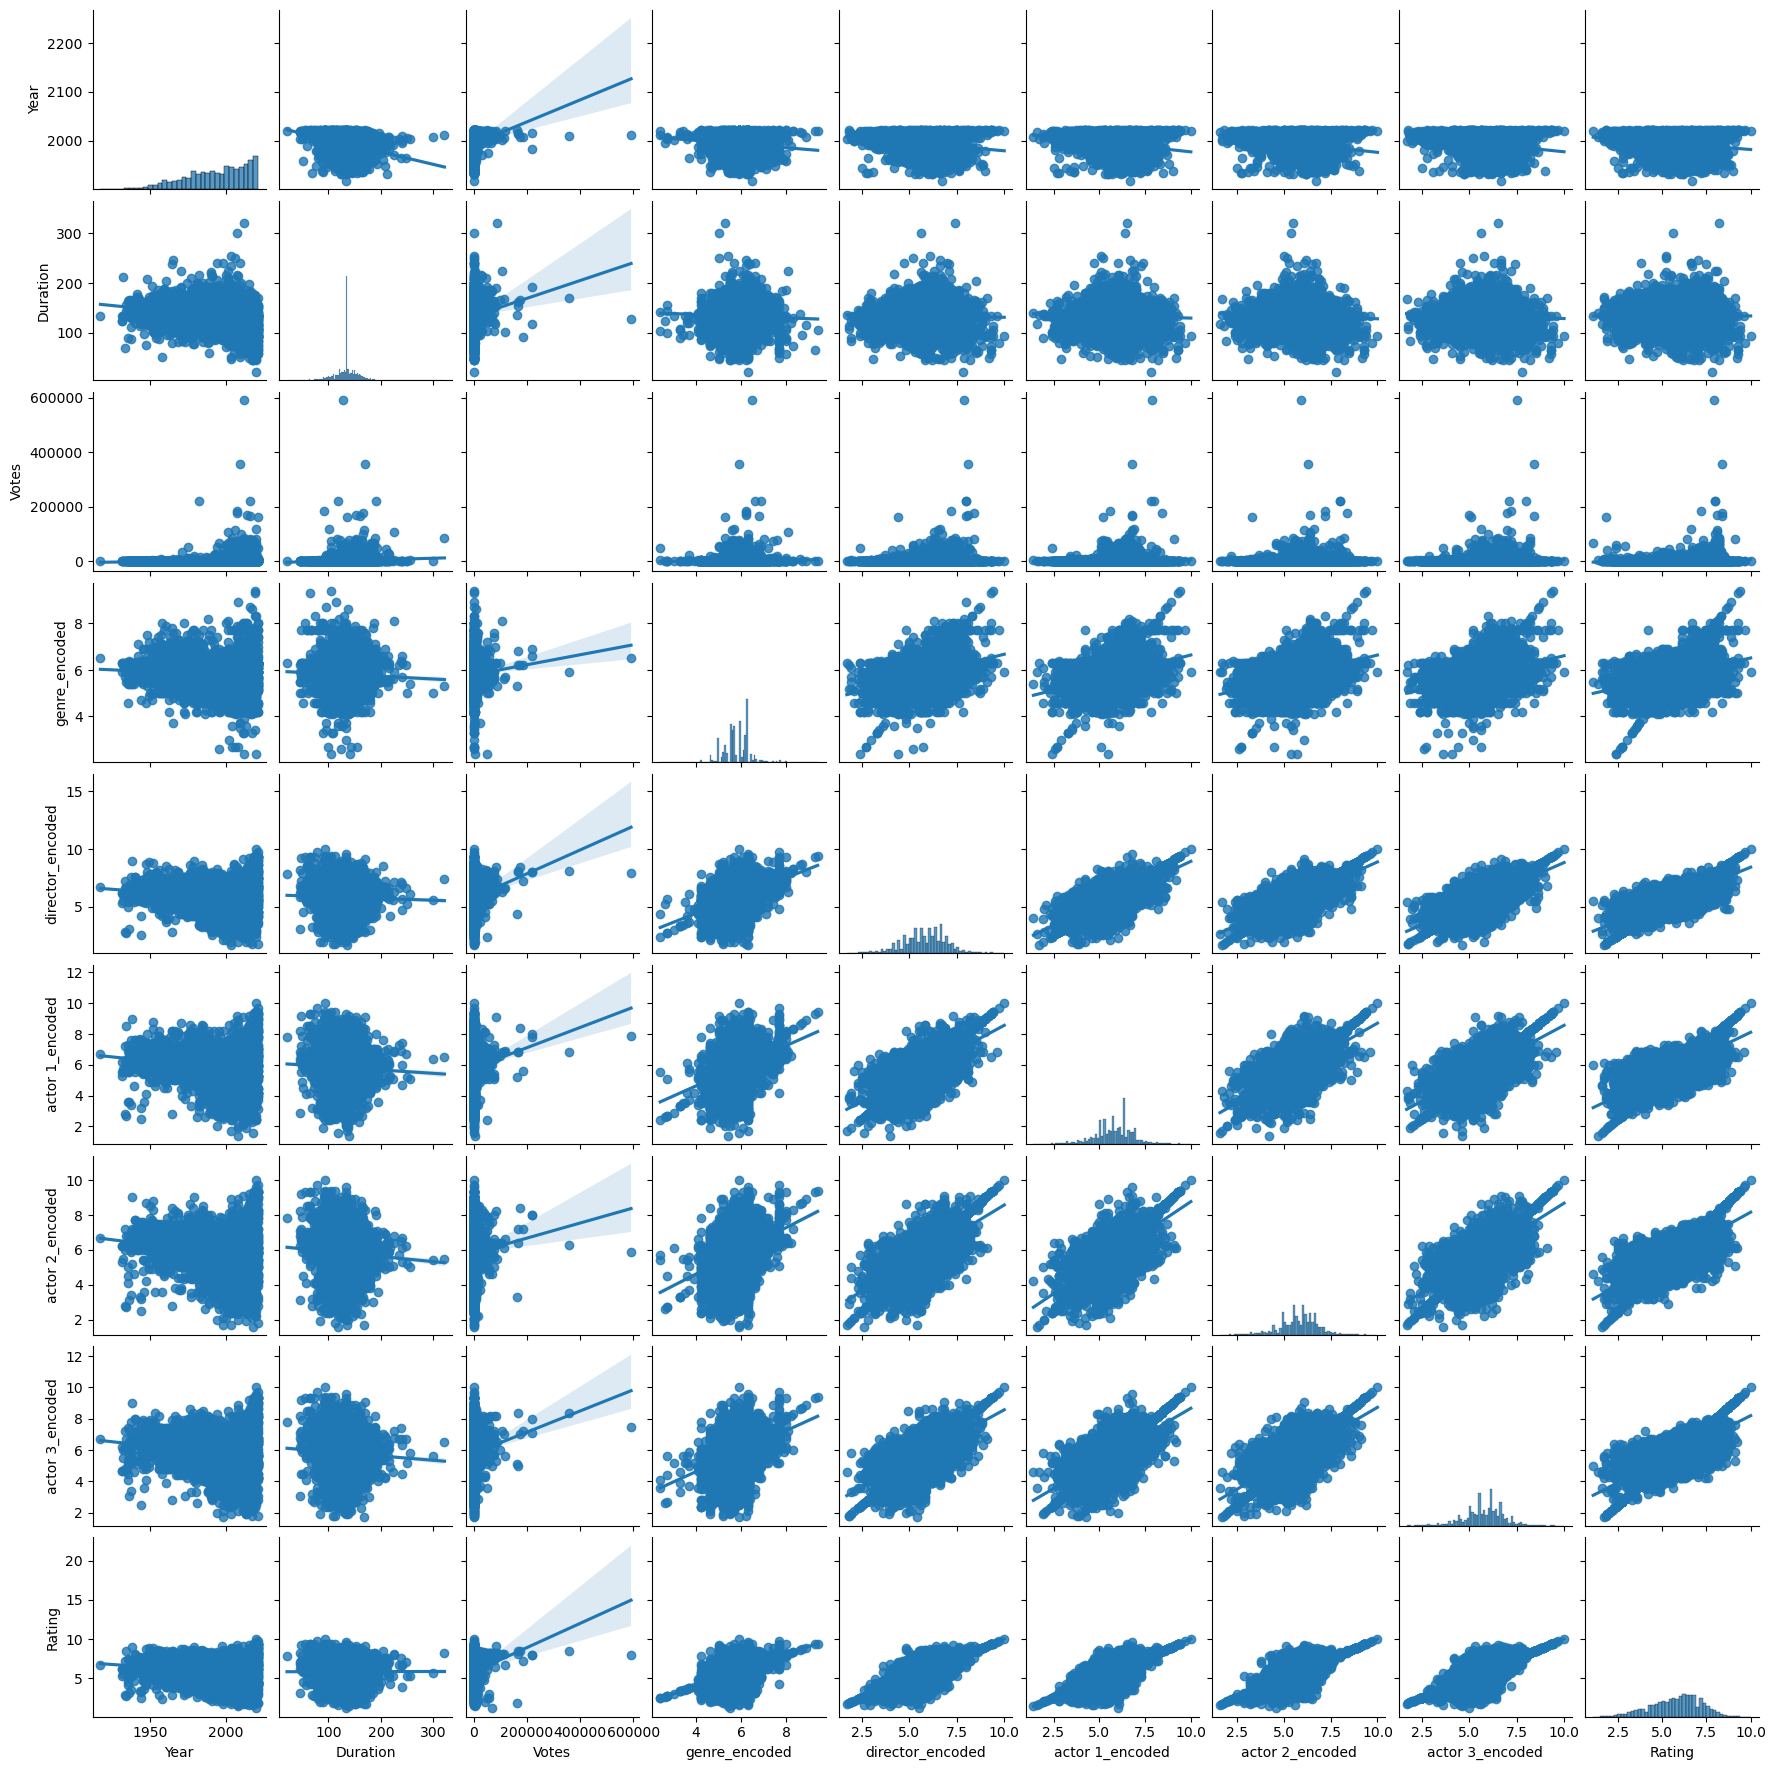

In [30]:
# Fit the multiple regression model
model = LinearRegression()
model.fit(X, y)

# Create a scatter plot matrix with regression lines
data = pd.concat([X, y], axis=1)
sns.pairplot(data, kind='reg', height=2)
plt.show()

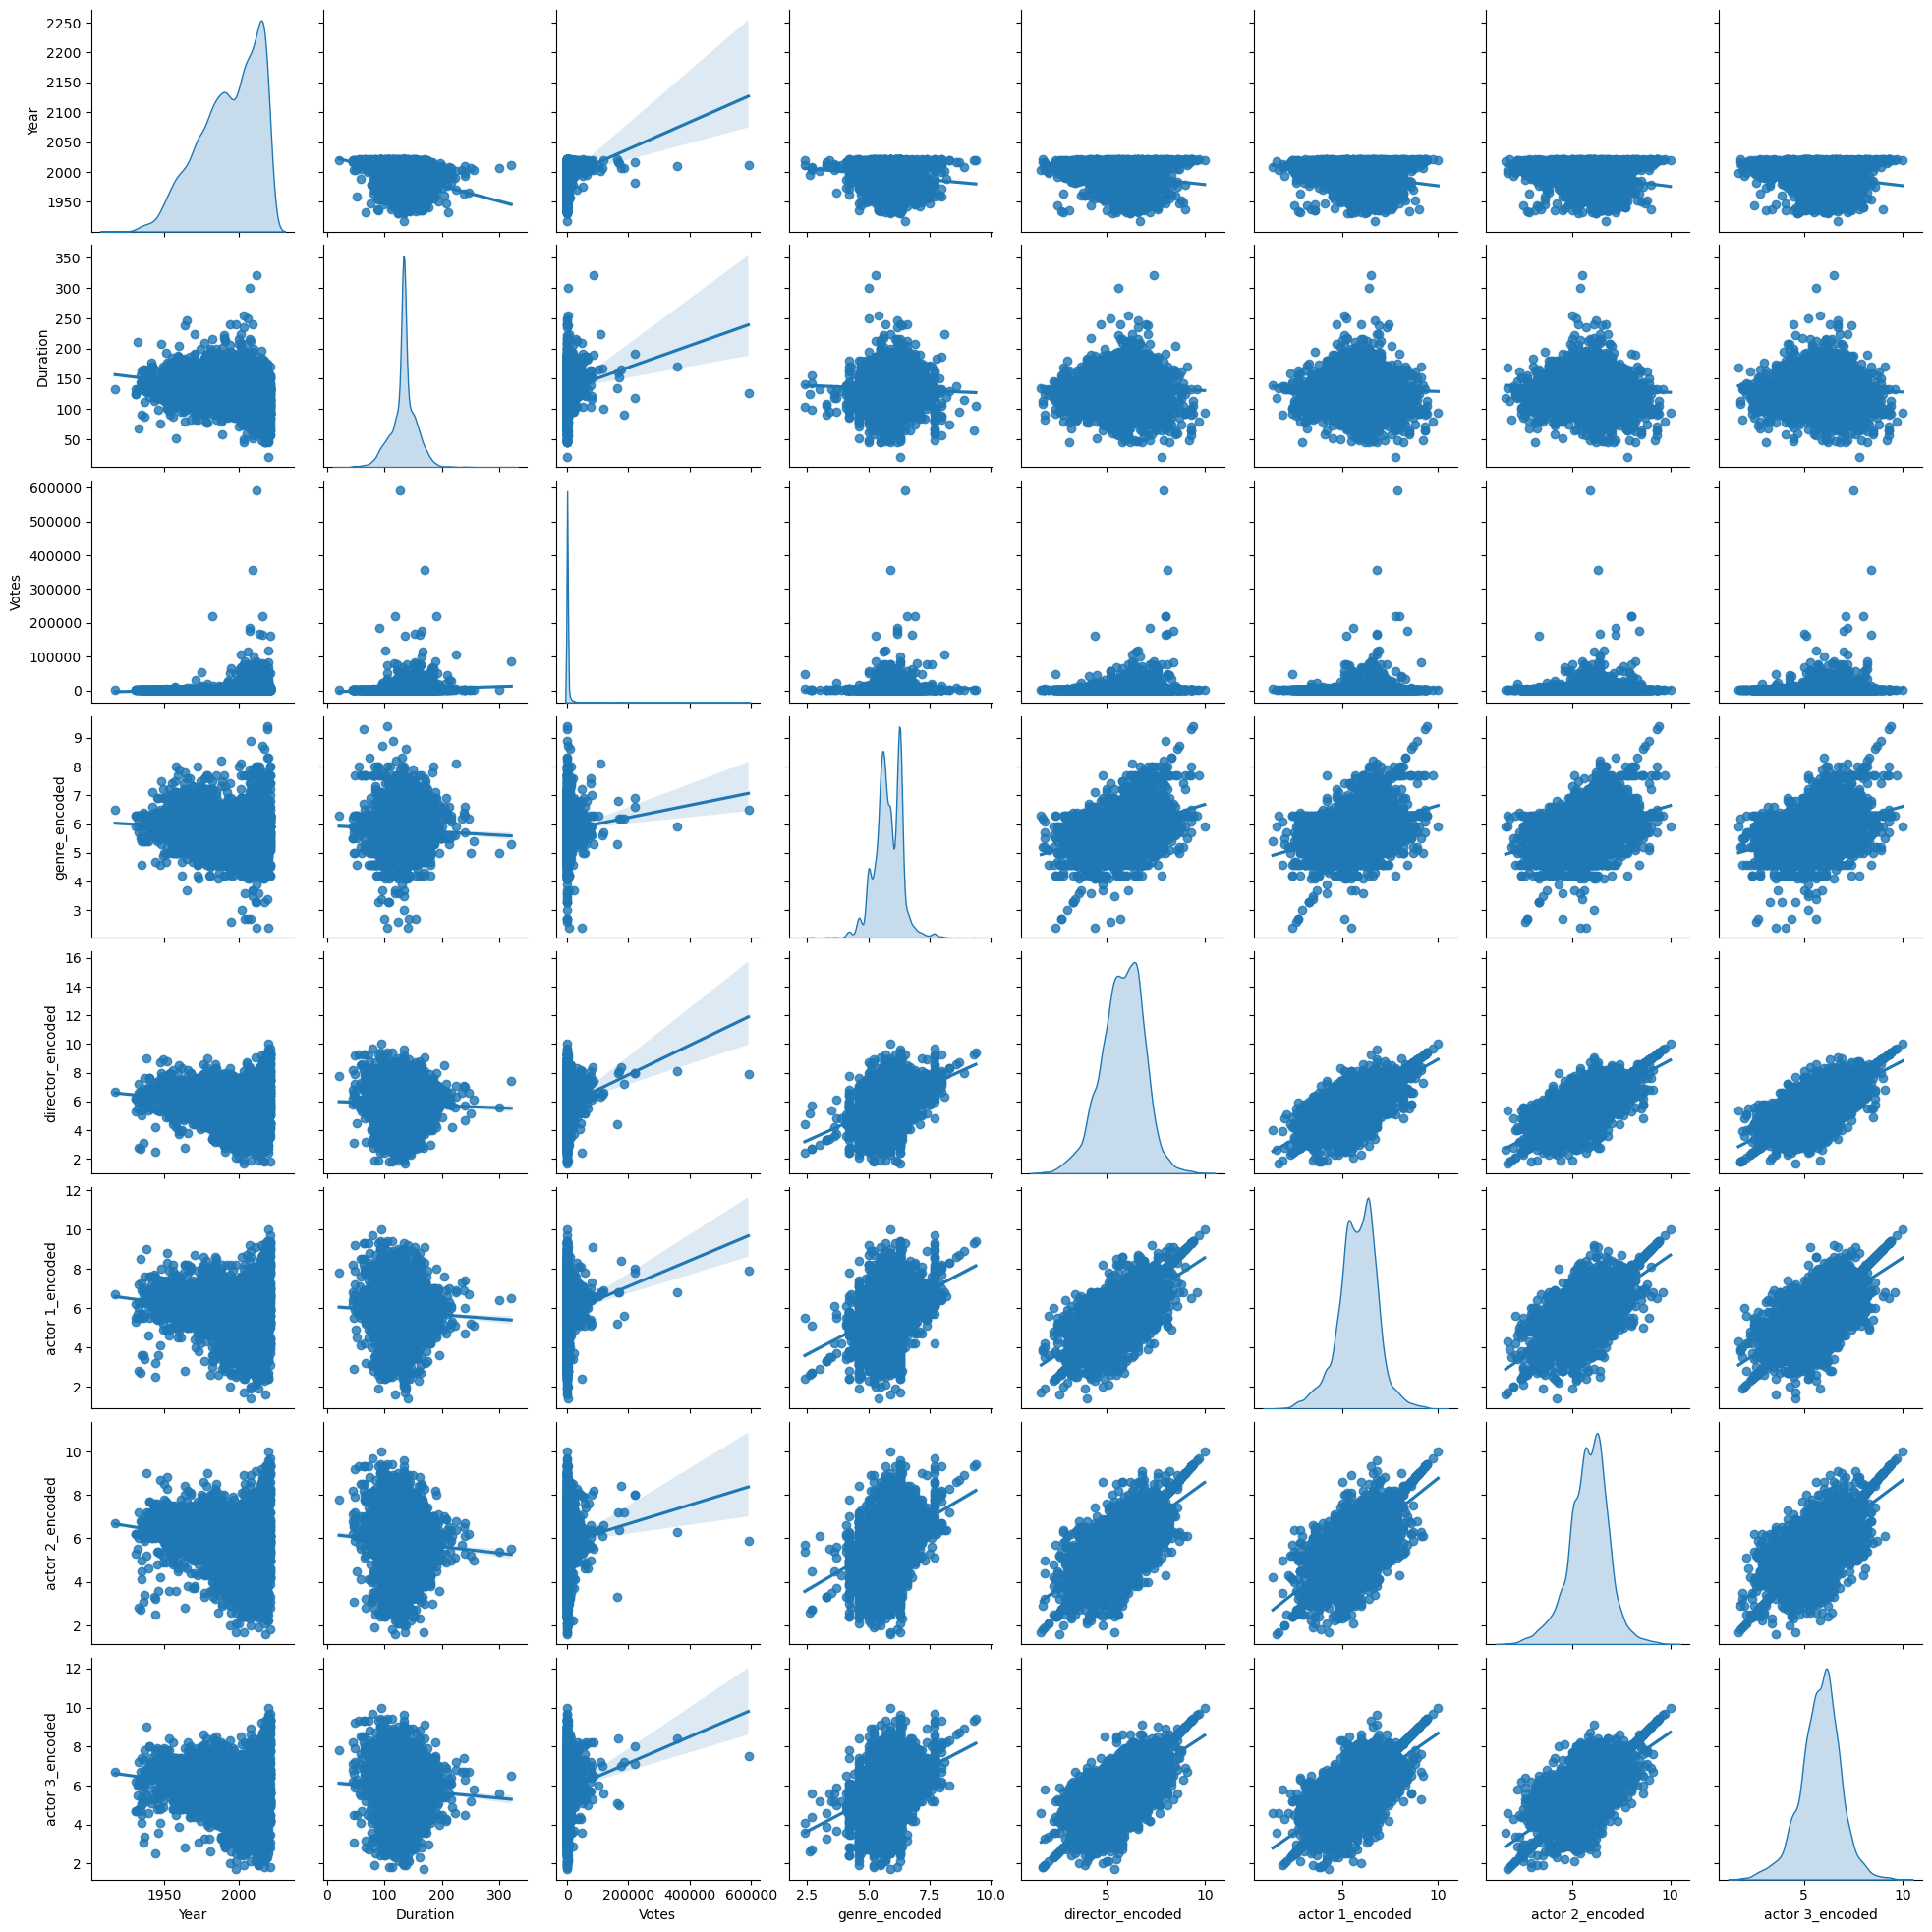

In [31]:
# Create a DataFrame for easy plotting
data = X

# Create a pair plot with multiple regression lines
sns.pairplot(data=data, kind='reg', diag_kind='kde')
plt.show()

In [32]:
model = LinearRegression().fit(X, y)

In [33]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.44780372892301734


In [34]:
# Print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [8.43979381e-04 3.07799971e-03 5.22627613e-06 1.34801746e-01
 4.06134261e-01 2.52996371e-01 2.74575739e-01 3.28263340e-01]
Intercept: -4.406851543272996


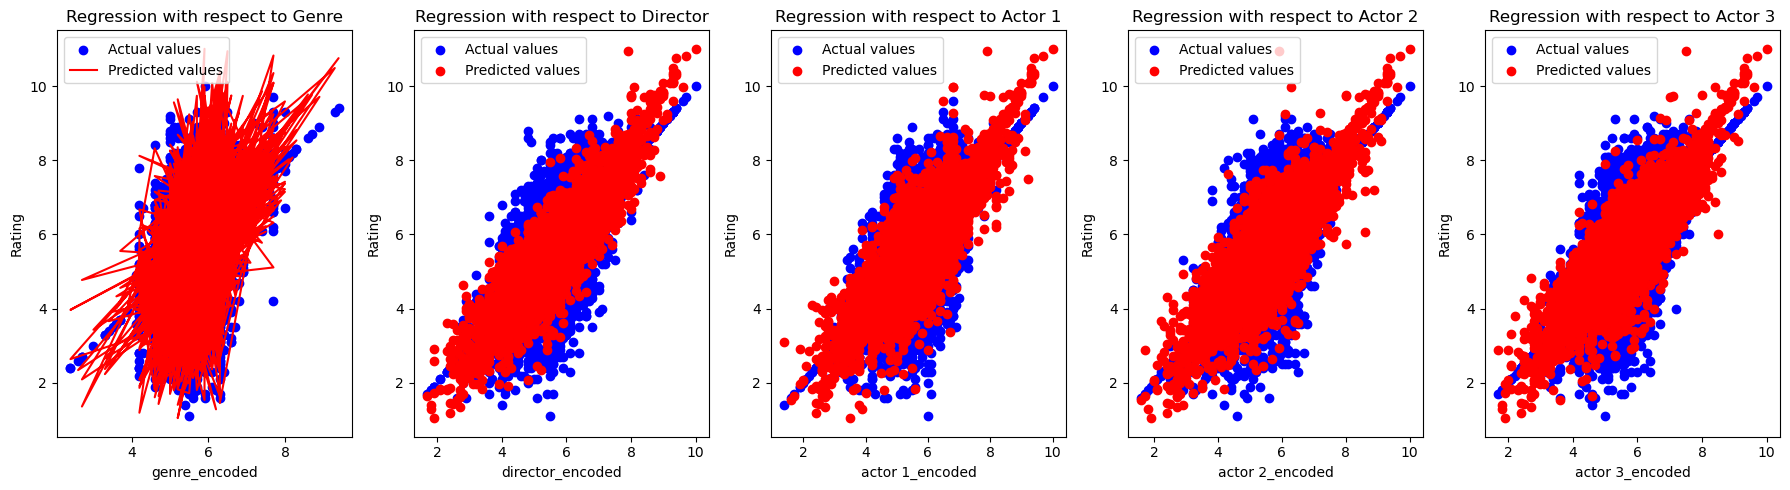

In [35]:
plt.figure(figsize=(18, 5))  # Adjusted the figure size to accommodate five subplots

# Plot for Genre
plt.subplot(1, 5, 1)  # Changed to 1, 5, 1 for 1x5 configuration
plt.scatter(df_update['genre_encoded'], df['Rating'], color='blue', label='Actual values')
plt.plot(df_update['genre_encoded'], y_pred, color='red', label='Predicted values')
plt.xlabel('genre_encoded')
plt.ylabel('Rating')
plt.title('Regression with respect to Genre')
plt.legend()

# Plot for Director
plt.subplot(1, 5, 2)  # Changed to 1, 3, 2 for 1x3 configuration
plt.scatter(df_update['director_encoded'], df['Rating'], color='blue', label='Actual values')
plt.scatter(df_update['director_encoded'], y_pred, color='red', label='Predicted values')
plt.xlabel('director_encoded')
plt.ylabel('Rating')
plt.title('Regression with respect to Director')
plt.legend()

# Plot for Actor 1
plt.subplot(1, 5, 3)  # Changed to 1, 3, 3 for 1x3 configuration
plt.scatter(df_update['actor 1_encoded'], df['Rating'], color='blue', label='Actual values')
plt.scatter(df_update['actor 1_encoded'], y_pred, color='red', label='Predicted values')
plt.xlabel('actor 1_encoded')
plt.ylabel('Rating')
plt.title('Regression with respect to Actor 1')
plt.legend()

# Plot for Actor 2
plt.subplot(1, 5, 4)  # Changed to 1, 3, 3 for 1x3 configuration
plt.scatter(df_update['actor 2_encoded'], df['Rating'], color='blue', label='Actual values')
plt.scatter(df_update['actor 2_encoded'], y_pred, color='red', label='Predicted values')
plt.xlabel('actor 2_encoded')
plt.ylabel('Rating')
plt.title('Regression with respect to Actor 2')
plt.legend()

# Plot for Actor 3
plt.subplot(1, 5, 5)  # Changed to 1, 3, 3 for 1x3 configuration
plt.scatter(df_update['actor 3_encoded'], df['Rating'], color='blue', label='Actual values')
plt.scatter(df_update['actor 3_encoded'], y_pred, color='red', label='Predicted values')
plt.xlabel('actor 3_encoded')
plt.ylabel('Rating')
plt.title('Regression with respect to Actor 3')
plt.legend()

plt.tight_layout()
plt.show()


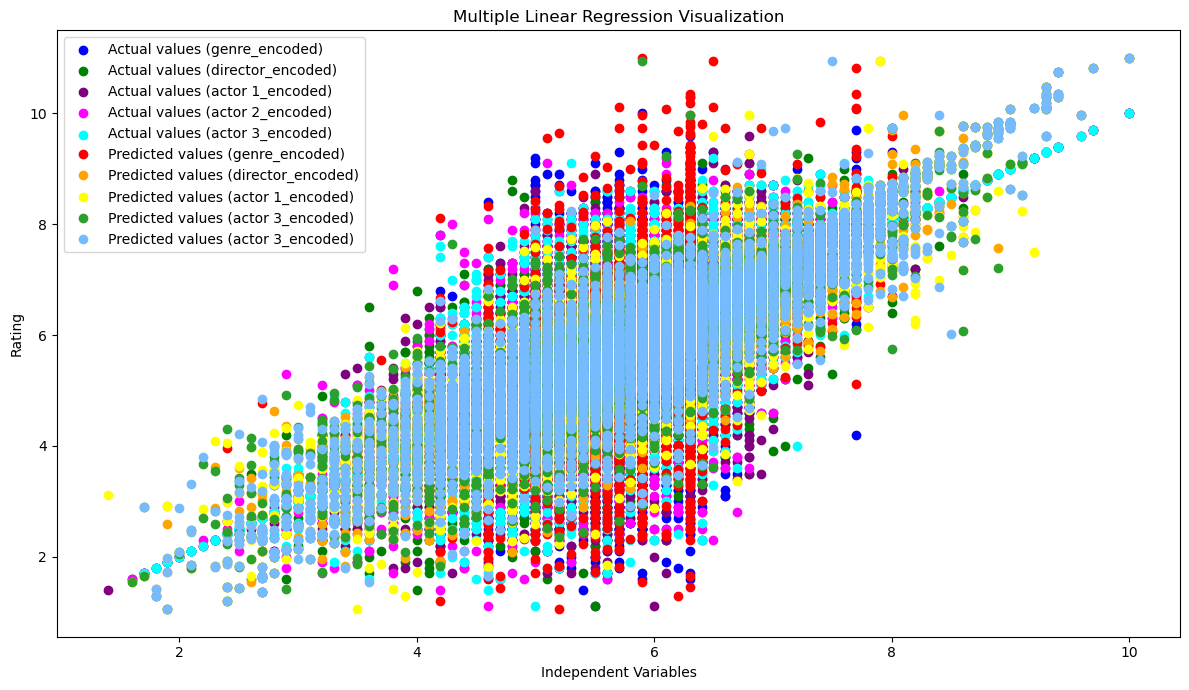

In [36]:
plt.figure(figsize=(12, 7))

# Plotting actual values
plt.scatter(df_update['genre_encoded'], df['Rating'], color='blue', label='Actual values (genre_encoded)')
plt.scatter(df_update['director_encoded'], df['Rating'], color='green', label='Actual values (director_encoded)')
plt.scatter(df_update['actor 1_encoded'], df['Rating'], color='purple', label='Actual values (actor 1_encoded)')
plt.scatter(df_update['actor 2_encoded'], df['Rating'], color='magenta', label='Actual values (actor 2_encoded)')
plt.scatter(df_update['actor 3_encoded'], df['Rating'], color='cyan', label='Actual values (actor 3_encoded)')

# Plotting predicted values
plt.plot(df_update['genre_encoded'], y_pred, color='red', marker='o', linestyle='', label='Predicted values (genre_encoded)')
plt.plot(df_update['director_encoded'], y_pred, color='orange', marker='o', linestyle='', label='Predicted values (director_encoded)')
plt.plot(df_update['actor 1_encoded'], y_pred, color='yellow', marker='o', linestyle='', label='Predicted values (actor 1_encoded)')
plt.plot(df_update['actor 2_encoded'], y_pred, color='tab:green', marker='o', linestyle='', label='Predicted values (actor 3_encoded)')
plt.plot(df_update['actor 3_encoded'], y_pred, color='xkcd:sky blue', marker='o', linestyle='', label='Predicted values (actor 3_encoded)')


plt.xlabel('Independent Variables')
plt.ylabel('Rating')
plt.title('Multiple Linear Regression Visualization')
plt.legend()

plt.tight_layout()
plt.show()

The Graph clearly shows that this model of linear Regressing doesnot fit, as you can see results, the line of best fit is overfitted.

## Decision Tree

In [43]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create a Decision tree regression model
tree = DecisionTreeRegressor(random_state=0)
# Define the hyperparameter grid
param_grid = {'max_depth': [None, 10, 20, 30]}
# Create a grid search object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
# Fit the grid search to your data
grid_search_tree.fit(X_train, y_train)

grid_search_tree.best_params_

{'max_depth': 10}

In [45]:
y_pred_tree = grid_search_tree.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_tree))
print('MAE: ',mean_absolute_error(y_test, y_pred_tree))
print('MSE: ', mean_squared_error(y_test, y_pred_tree))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_tree)))

R^2:  0.7067384067132875
MAE:  0.5133454829868263
MSE:  0.5433660448201112
RMSE:  0.7371336682177196


## Random Forest

In [47]:
# Create a Random Forest Regressor model
RF = RandomForestRegressor(random_state=0)
param_grid = {'min_samples_leaf': [1, 3, 5]}
grid_search_RF = GridSearchCV(RF, param_grid, cv=5, scoring='r2')
# Fit the grid search to the data
grid_search_RF.fit(X_train, y_train)

grid_search_RF.best_params_

{'min_samples_leaf': 1}

In [48]:
y_pred_RF = grid_search_RF.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_RF))
print('MAE: ',mean_absolute_error(y_test, y_pred_RF))
print('MSE: ', mean_squared_error(y_test, y_pred_RF))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_RF)))

R^2:  0.796666150118691
MAE:  0.428318783068783
MSE:  0.37674455952380953
RMSE:  0.6137952097595822
